In [254]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import time
import json
import re
from spacy_langdetect import LanguageDetector
import spacy
from langdetect import detect_langs


In [1]:
from selenium.webdriver.edge import service
from selenium import webdriver
from selenium.webdriver.common.by import By
from collections import Counter
from nltk.corpus import stopwords
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

# Scraping Demand

In [2]:
# Load data
pages = pd.read_csv("data/safe_obs_dataset.csv", sep=";", index_col = "Unnamed: 0")

## Collect available timestamps

In [3]:
wayback_snapshots = ["20201207","20201215", "20201219", "20201224",  "20220101", "20220110", "20220122", "20220123", "20220126", "20220128", "20220204","20220211", "20220223", "20220224","20220301","20220304","20220307","20220308", "20220330", "20220402","20220403","202204415","20220417","20220424","20220429","20220509", "20220510","20220518","20220519","20220526","20220530","20210105", "20210110","20210117", "20210118", "20210123","20210124","20210125","20210126","20210131","20210201", "20210224", "20210307","20210314","20210317","20210319","20210322","20210323","20210324","20210325","20210326","20210330","20210408","20210411","20210421","20210429","20210601","20210608","20210612","20210614","20210801","20210806","20210811","20210812","20210816","20210825","20210902","20210904","20210926","20210929","20211004","20211005","20211006","20211008","20211013","20211015","20211015","20211025","20211027","20211029","20211031","20211105","20211115","20211117","20211209","20211213","20211216","20211217"]

In [8]:
pages["googleplay_shortlink"] = pages["googleplay_link"].str.replace("https://","").str.strip("/")

In [10]:
dict_gp = pages[pages["googleplay_shortlink"].isnull()==False][["url", "googleplay_shortlink"]].to_dict(orient="records")

In [11]:
dict_gp

[{'url': '/t/app-6-0-compass-of-chance.4440211/',
  'googleplay_shortlink': 'play.google.com/store/apps/details?id=com.baiumka.compass_of_chance'},
 {'url': '/t/app-6-0-netguard-no-root-firewall.3233012/',
  'googleplay_shortlink': 'play.google.com/store/apps/details?id=eu.faircode.netguard'},
 {'url': '/t/app-11-dual-camera-video-recorder.4447581/',
  'googleplay_shortlink': 'play.google.com/store/apps/details?id=com.helge.dualcameravideorecorder'},
 {'url': '/t/app-4-0-true-phone-best-dialer-contact-manager-replacement.2934816/',
  'googleplay_shortlink': 'play.google.com/store/apps/details?id=com.hb.dialer.free&referrer=utm_source%3Dforums%26utm_medium%3Dxda'},
 {'url': '/t/app-root-4-0-battery-charge-limit-v1-1-1.3557002/',
  'googleplay_shortlink': 'play.google.com/store/apps/details?id=rs.pedjaapps.alogcatroot.app'},
 {'url': '/t/app-free-4-1-warm-up-exercises-and-training.4447459/',
  'googleplay_shortlink': 'play.google.com/store/apps/details?id=com.morningexercises.dzmitry'},


In [99]:
empty_att = []
try_again = []

In [ ]:
#snapshots = []
#counter=0

for date in wayback_snapshots:
    for gp_link in dict_gp:
        if gp_link["googleplay_shortlink"] not in empty_att:
            gp_page ={}
            
            gp_page["gp_url"] = gp_link["googleplay_shortlink"] 
            gp_page["try_url"] = date
            if gp_page.copy() not in finished_dict:
                #print("new")
                url = "http://archive.org/wayback/available?url=" + gp_link["googleplay_shortlink"] + '&timestamp=' + date
                r = requests.get(url)
                if r:
                    if len(r.json()["archived_snapshots"])>0:
                        if r.json()["archived_snapshots"]["closest"]["status"] == "200":
                            gp_page["gp_url"] = gp_link["googleplay_shortlink"] 
                            gp_page["timestamp"] = r.json()["archived_snapshots"]["closest"]["timestamp"]
                            gp_page["wb_url"] = r.json()["archived_snapshots"]["closest"]["url"]
                            check_d = {k: v for k, v in gp_page.copy().items() if k != 'try_url'}
                            check_list = [{k: v for k, v in d.items() if k != 'try_url'} for d in snapshots]
                            if check_d.copy() not in check_list:
                                snapshots.append(gp_page.copy())
                    else:
                        empty_att.append(gp_page["gp_url"])
                else:
                    try_again.append(gp_page)
                
    counter += 1
    print(counter)

24


{'gp_url': 'play.google.com/store/apps/details?id=neither.dynamicpin',
 'try_url': '20201215'}

In [124]:
finished = pd.DataFrame(snapshots)
finished

,gp_url,timestamp,wb_url,try_url
0,play.google.com/store/apps/details?id=com.baiu...,20220426080658,http://web.archive.org/web/20220426080658/http...,NaN
1,play.google.com/store/apps/details?id=eu.fairc...,20201128175644,http://web.archive.org/web/20201128175644/http...,NaN
2,play.google.com/store/apps/details?id=com.helg...,20220519073537,http://web.archive.org/web/20220519073537/http...,NaN
3,play.google.com/store/apps/details?id=com.hb.d...,20201204194737,http://web.archive.org/web/20201204194737/http...,NaN
4,play.google.com/store/apps/details?id=rs.pedja...,20201111200810,http://web.archive.org/web/20201111200810/http...,NaN
...,...,...,...,...
7175,play.google.com/store/apps/details?id=cdev.life,20220404215837,http://web.archive.org/web/20220404215837/http...,20220403
7176,play.google.com/store/apps/details?id=com.andr...,20220404011200,http://web.archive.org/web/20220404011200/http...,20220403
7177,play.google.com/store/apps/details?id=com.what...,20220403175737,http://web.archive.org/web/20220403175737/http...,20220403
7178,play.google.com/store/apps/details?id=com.skyp...,20220405031549,http://web.archive.org/web/20220405031549/http...,20220403


In [125]:
finished.loc[finished["try_url"].isnull() == True, "try_url"] = "20201207"

In [126]:
finished

,gp_url,timestamp,wb_url,try_url
0,play.google.com/store/apps/details?id=com.baiu...,20220426080658,http://web.archive.org/web/20220426080658/http...,20201207
1,play.google.com/store/apps/details?id=eu.fairc...,20201128175644,http://web.archive.org/web/20201128175644/http...,20201207
2,play.google.com/store/apps/details?id=com.helg...,20220519073537,http://web.archive.org/web/20220519073537/http...,20201207
3,play.google.com/store/apps/details?id=com.hb.d...,20201204194737,http://web.archive.org/web/20201204194737/http...,20201207
4,play.google.com/store/apps/details?id=rs.pedja...,20201111200810,http://web.archive.org/web/20201111200810/http...,20201207
...,...,...,...,...
7175,play.google.com/store/apps/details?id=cdev.life,20220404215837,http://web.archive.org/web/20220404215837/http...,20220403
7176,play.google.com/store/apps/details?id=com.andr...,20220404011200,http://web.archive.org/web/20220404011200/http...,20220403
7177,play.google.com/store/apps/details?id=com.what...,20220403175737,http://web.archive.org/web/20220403175737/http...,20220403
7178,play.google.com/store/apps/details?id=com.skyp...,20220405031549,http://web.archive.org/web/20220405031549/http...,20220403


In [57]:
finished_dict = finished[["gp_url", "try_url"]].to_dict(orient="records")

In [79]:
old = pd.DataFrame(dict_gp)

In [90]:
old

,url,googleplay_shortlink
0,/t/app-6-0-compass-of-chance.4440211/,play.google.com/store/apps/details?id=com.baiu...
1,/t/app-6-0-netguard-no-root-firewall.3233012/,play.google.com/store/apps/details?id=eu.fairc...
2,/t/app-11-dual-camera-video-recorder.4447581/,play.google.com/store/apps/details?id=com.helg...
3,/t/app-4-0-true-phone-best-dialer-contact-mana...,play.google.com/store/apps/details?id=com.hb.d...
4,/t/app-root-4-0-battery-charge-limit-v1-1-1.35...,play.google.com/store/apps/details?id=rs.pedja...
...,...,...
5832,/t/app-sequitimer.1498223/,play.google.com/store/apps/details?id=com.plum...
5833,/t/app-free-fu-ing-lousy-advice.1478522/,play.google.com/store/apps/details?id=ru.andre...
5834,/t/app-fastmeteo.1337572/,play.google.com/store/apps/details?id=com.app....
5835,/t/app-advanced-app-locker-free.1103940/,play.google.com/store/apps/details?id=com.antt...


In [93]:
fin = pd.merge(old, finished[finished["try_url"]=="20201207"], left_on = "googleplay_shortlink", right_on = "gp_url", how = "outer")

In [96]:
# I assume that if there was no closest snapshot, then there are no snapshots at all for this page!
empty = list(fin[fin["wb_url"].isnull()]["googleplay_shortlink"])

In [127]:
finished = finished.drop_duplicates(subset = ["gp_url", "timestamp"])

In [129]:
finished.to_csv("data/av_gplinks.csv")

In [130]:
finished

,gp_url,timestamp,wb_url,try_url
0,play.google.com/store/apps/details?id=com.baiu...,20220426080658,http://web.archive.org/web/20220426080658/http...,20201207
1,play.google.com/store/apps/details?id=eu.fairc...,20201128175644,http://web.archive.org/web/20201128175644/http...,20201207
2,play.google.com/store/apps/details?id=com.helg...,20220519073537,http://web.archive.org/web/20220519073537/http...,20201207
3,play.google.com/store/apps/details?id=com.hb.d...,20201204194737,http://web.archive.org/web/20201204194737/http...,20201207
4,play.google.com/store/apps/details?id=rs.pedja...,20201111200810,http://web.archive.org/web/20201111200810/http...,20201207
...,...,...,...,...
7175,play.google.com/store/apps/details?id=cdev.life,20220404215837,http://web.archive.org/web/20220404215837/http...,20220403
7176,play.google.com/store/apps/details?id=com.andr...,20220404011200,http://web.archive.org/web/20220404011200/http...,20220403
7177,play.google.com/store/apps/details?id=com.what...,20220403175737,http://web.archive.org/web/20220403175737/http...,20220403
7178,play.google.com/store/apps/details?id=com.skyp...,20220405031549,http://web.archive.org/web/20220405031549/http...,20220403


## Scrape available pages

In [289]:
# Batch 0:
#gp_df = pd.read_csv("data/av_gplinks.csv", index_col="Unnamed: 0")
#Batch 1&2:
gp_df_1 = pd.read_csv("data/av_gplinks_batch1.csv", sep = ";", index_col = "Unnamed: 0")
gp_df_2 = pd.read_csv("data/av_gplinks_batch2.csv", sep = ";", index_col="Unnamed: 0")

In [305]:
gp_df_1

,gp_url,timestamp,wb_url,try_url
0,play.google.com/store/apps/details?id=com.baiu...,20220426080658,http://web.archive.org/web/20220426080658/http...,20201207
1,play.google.com/store/apps/details?id=eu.fairc...,20201128175644,http://web.archive.org/web/20201128175644/http...,20201207
2,play.google.com/store/apps/details?id=com.helg...,20220519073537,http://web.archive.org/web/20220519073537/http...,20201207
3,play.google.com/store/apps/details?id=com.hb.d...,20201204194737,http://web.archive.org/web/20201204194737/http...,20201207
4,play.google.com/store/apps/details?id=rs.pedja...,20201111200810,http://web.archive.org/web/20201111200810/http...,20201207
...,...,...,...,...
4875,play.google.com/store/apps/details?id=com.andr...,20210314232240,http://web.archive.org/web/20210314232240/http...,20210314
4876,play.google.com/store/apps/details?id=com.them...,20210502085151,http://web.archive.org/web/20210502085151/http...,20210314
4877,play.google.com/store/apps/details?id=org.thou...,20210314233052,http://web.archive.org/web/20210314233052/http...,20210314
4878,play.google.com/store/apps/details?id=com.vsco...,20210318213639,http://web.archive.org/web/20210318213639/http...,20210314


In [302]:
gp_df_1["timestamp"] = gp_df_1["timestamp"].astype(str)
gp_df_2["timestamp"] = gp_df_2["timestamp"].astype(str)

In [303]:
gp_new = pd.concat([gp_df, gp_df_1, gp_df_2]).drop_duplicates(subset=["gp_url", "timestamp"]).reset_index(drop=True)

In [312]:
gp_new

,gp_url,timestamp,wb_url,try_url
0,play.google.com/store/apps/details?id=com.baiu...,20220426080658,http://web.archive.org/web/20220426080658/http...,20201207
1,play.google.com/store/apps/details?id=eu.fairc...,20201128175644,http://web.archive.org/web/20201128175644/http...,20201207
2,play.google.com/store/apps/details?id=com.helg...,20220519073537,http://web.archive.org/web/20220519073537/http...,20201207
3,play.google.com/store/apps/details?id=com.hb.d...,20201204194737,http://web.archive.org/web/20201204194737/http...,20201207
4,play.google.com/store/apps/details?id=rs.pedja...,20201111200810,http://web.archive.org/web/20201111200810/http...,20201207
...,...,...,...,...
10867,play.google.com/store/apps/details?id=com.goog...,20211216110737,http://web.archive.org/web/20211216110737/http...,20211216
10868,play.google.com/store/apps/details?id=it.mirko...,20211220222811,http://web.archive.org/web/20211220222811/http...,20211217
10869,play.google.com/store/apps/details?id=com.andr...,20211218001854,http://web.archive.org/web/20211218001854/http...,20211217
10870,play.google.com/store/apps/details?id=org.thou...,20211217233132,http://web.archive.org/web/20211217233132/http...,20211217


In [315]:
df = gp_new.merge(gp_df, on=gp_new.columns.to_list(), 
                   how='left', indicator=True).drop_duplicates(subset=["gp_url", "timestamp"])

In [318]:
df

,gp_url,timestamp,wb_url,try_url,_merge
0,play.google.com/store/apps/details?id=com.baiu...,20220426080658,http://web.archive.org/web/20220426080658/http...,20201207,both
1,play.google.com/store/apps/details?id=eu.fairc...,20201128175644,http://web.archive.org/web/20201128175644/http...,20201207,both
2,play.google.com/store/apps/details?id=com.helg...,20220519073537,http://web.archive.org/web/20220519073537/http...,20201207,both
3,play.google.com/store/apps/details?id=com.hb.d...,20201204194737,http://web.archive.org/web/20201204194737/http...,20201207,both
4,play.google.com/store/apps/details?id=rs.pedja...,20201111200810,http://web.archive.org/web/20201111200810/http...,20201207,both
...,...,...,...,...,...
10867,play.google.com/store/apps/details?id=com.goog...,20211216110737,http://web.archive.org/web/20211216110737/http...,20211216,left_only
10868,play.google.com/store/apps/details?id=it.mirko...,20211220222811,http://web.archive.org/web/20211220222811/http...,20211217,left_only
10869,play.google.com/store/apps/details?id=com.andr...,20211218001854,http://web.archive.org/web/20211218001854/http...,20211217,left_only
10870,play.google.com/store/apps/details?id=org.thou...,20211217233132,http://web.archive.org/web/20211217233132/http...,20211217,left_only


In [317]:
df_next = df.loc[df._merge=='left_only',df.columns!='_merge'].reset_index(drop=True)

In [319]:
gp_dict = df_next[["gp_url", "wb_url", "timestamp"]].to_dict(orient="records")


In [320]:
counter = 0

In [359]:
for gp_page in gp_dict[6045:]:
    url = gp_page["wb_url"]
    r = requests.get(url)
    time.sleep(5)
    if r:
        soup = BeautifulSoup(r.text)
        if soup.find('h1') is not None:
            gp_page["app_name"] = soup.find('h1').get_text()
        elif soup.find(class_="document-title") is not None:
            gp_page["app_name"] = soup.find(class_="document-title").get_text().strip()
        else:
            gp_page["app_name"] = soup.find(class_="document-title").get_text().strip()
        gp_page["ads"] = re.search("Ads", soup.text) is not None
        gp_page["paid_features"] = re.search("In-app Products", soup.text) is not None
        
        if re.search("(?<=Installs)\d[\d,]*\+", soup.text) is not None:
            gp_page["demand"] = re.search("(?<=Installs)\d[\d,]*\+", soup.text).group(0)
            gp_page["demand_flag"] = False
        elif re.search("(?<=Installs)\d[0,]* \- \d[0,]*", soup.text) is not None: 
            gp_page["demand"]= re.search("(?<=Installs)\d[0,]* \- \d[0,]*", soup.text).group(0)
            gp_page["demand_flag"] = False
        
        elif re.search("\d[\d,]*\+", soup.text) is not None:
            gp_page["demand"] = re.search("\d[\d,]*\+", soup.text).group(0)
            
        gp_page["paid_new"] = len(re.findall('aria-label=".+ Buy">', r.text)) > 0
        gp_page["language_flag"]=len(re.findall("[\[\]^en0-9\.:]", str(detect_langs(soup.text))))>0
    counter += 1
    if counter % 100 == 0:
        print(counter)

AttributeError: 'NoneType' object has no attribute 'get_text'

In [360]:
url

'http://web.archive.org/web/20210902233114/https://play.google.com/store/apps/details?id=org.thoughtcrime.securesms'

In [358]:
new = pd.DataFrame(gp_dict)
new[new["app_name"].isnull()==False]

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid_new,language_flag
0,play.google.com/store/apps/details?id=com.baiu...,http://web.archive.org/web/20220426080658/http...,20220426080658,Compass of Chance: Your Dream,True,False,1+,False,False,True
1,play.google.com/store/apps/details?id=eu.fairc...,http://web.archive.org/web/20201128175644/http...,20201128175644,NetGuard - no-root firewall,False,True,"1,000,000+",False,False,True
2,play.google.com/store/apps/details?id=com.helg...,http://web.archive.org/web/20220519073537/http...,20220519073537,Dual Camera Video Recorder,True,True,0+,False,False,True
3,play.google.com/store/apps/details?id=com.hb.d...,http://web.archive.org/web/20201204194737/http...,20201204194737,True Phone Dialer & Contacts & Call Recorder,True,True,"5,000,000+",False,False,True
4,play.google.com/store/apps/details?id=rs.pedja...,http://web.archive.org/web/20201111200810/http...,20201111200810,[ROOT] aLogcat,True,False,"100,000+",False,False,True
...,...,...,...,...,...,...,...,...,...,...
6040,play.google.com/store/apps/details?id=com.joro...,http://web.archive.org/web/20211213162802/http...,20211213162802,TalkFaster!,False,False,"500,000+",NaN,False,True
6041,play.google.com/store/apps/details?id=com.hada...,http://web.archive.org/web/20210903192648/http...,20210903192648,WikiGame - A Wikipedia Game,False,False,"10,000+",NaN,False,True
6042,play.google.com/store/apps/details?id=com.face...,http://web.archive.org/web/20210902070327/http...,20210902070327,Facebook,False,False,000+,NaN,False,True
6043,play.google.com/store/apps/details?id=com.lone...,http://web.archive.org/web/20211009200055/http...,20211009200055,X-plore File Manager,False,False,11+,NaN,False,True


In [242]:
susp = finished[(finished["ads"]==False)&(finished["paid_features"]==False)&(finished["demand_flag"]==False)]

'<!doctype html><html lang="cs" dir="ltr"><head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>\n<script type="text/javascript">window.addEventListener(\'DOMContentLoaded\',function(){var v=archive_analytics.values;v.service=\'wb\';v.server_name=\'wwwb-app202.us.archive.org\';v.server_ms=2118;archive_analytics.send_pageview({});});</script>\n<script type="text/javascript" src="/_static/js/bundle-playback.js?v=36gO9Ebf" charset="utf-8"></script>\n<script type="text/javascript" src="/_static/js/wombat.js?v=UHAOicsW" charset="utf-8"></script>\n<script type="text/javascript">\n  __wm.init("http://web.archive.org/web");\n  __wm.wombat("https://play.google.com/store/apps/details?id=com.hvt.horizon","20220524184115","http://web.archive.org/","web","/_static/",\n\t      "1653417675");\n</script>\n<link rel="stylesheet" type="text/css" href="/_static/css/banner-styles.css?v=fantwOh2" />\n<link rel="stylesheet" type="text/css" href="/_static/css/icono
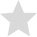
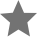
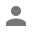
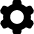
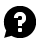
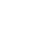
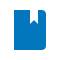
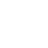
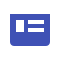
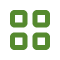
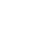
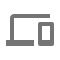
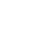
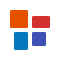
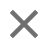
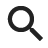
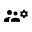
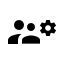
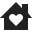
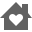
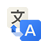
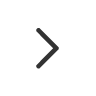
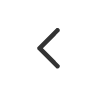
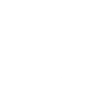
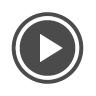
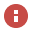
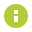
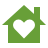
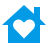
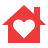
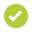
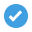
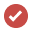
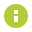

In [281]:
r.text

In [275]:
re.findall("[^en0-9\.:]", str(detect_langs(soup.text)[0]))

['c', 's']

In [279]:
url

'http://web.archive.org/web/20220524184115/https://play.google.com/store/apps/details?id=com.hvt.horizon'

In [245]:
susp.loc[15,"wb_url"]

'http://web.archive.org/web/20201124203927/https://play.google.com/store/apps/details?id=de.nullgrad.glimpse'

In [154]:
finished = pd.DataFrame(gp_dict)

In [166]:
#finished.loc[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False), "demand"] = [x.group(0) for x in finished.loc[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False), "demand"]]

In [171]:
finished.loc[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False)&(finished["demand"].str.contains(",")==True), "demand_flag"] = False

In [176]:
finished.loc[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False)&(finished["demand"].str.contains(r"[1-9]0+")==True), "demand_flag"]=False

In [177]:
finished[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False)]

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid
8,play.google.com/store/apps/details?id=de.j4vel...,http://web.archive.org/web/20140704151929/http...,20140704151929,Recenze,False,False,3+,True,False
48,play.google.com/store/apps/details?id=com.rasc...,http://web.archive.org/web/20201130210736/http...,20201130210736,Tiles,False,False,000+,True,False
55,play.google.com/store/apps/details?id=com.grar...,http://web.archive.org/web/20191224175827/http...,20191224175827,Kernel Adiutor (ROOT),False,False,000+,True,False
66,play.google.com/store/apps/details?id=com.marl...,http://web.archive.org/web/20200907142300/http...,20200907142300,Search Everything,True,False,000+,True,False
88,play.google.com/store/apps/details?id=com.cont...,http://web.archive.org/web/20220412053734/http...,20220412053734,Kontakt sichern Cloud-Speicher,False,False,000+,True,False
...,...,...,...,...,...,...,...,...,...
4617,play.google.com/store/apps/details?id=com.cls....,http://web.archive.org/web/20220321033255/http...,20220321033255,Storage Space,False,False,000+,True,False
4621,play.google.com/store/apps/details?id=com.scee...,http://web.archive.org/web/20220403074537/http...,20220403074537,PlayStation App,False,False,13+,True,False
4629,play.google.com/store/apps/details?id=com.hvt....,http://web.archive.org/web/20220524184115/http...,20220524184115,Horizon Camera,False,False,000+,True,False
4648,play.google.com/store/apps/details?id=ru.infte...,http://web.archive.org/web/20220407132142/http...,20220407132142,Day by Day Organizer,False,False,2+,True,False


In [185]:
dot_issues = finished[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False)&(finished["demand"].str.contains('000+', regex=False))].to_dict(orient="records")

In [198]:
# scraping the dot issues:
for gp_page in dot_issues[85:]:
    url = gp_page["wb_url"]
    r = requests.get(url)
    time.sleep(3)
    if r:
        soup = BeautifulSoup(r.text)
        if re.search("\d[\d\.]*\+", soup.text) is not None:
            gp_page["demand"] = re.search("\d[\d\.]*\+", soup.text).group(0)
            gp_page["demand_flag"] = False
        
    counter += 1
    if counter % 100 == 0:
        print(counter)


4800
4900


In [199]:
pd.DataFrame(dot_issues)

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid
0,play.google.com/store/apps/details?id=com.rasc...,http://web.archive.org/web/20201130210736/http...,20201130210736,Tiles,False,False,100.000+,False,False
1,play.google.com/store/apps/details?id=com.grar...,http://web.archive.org/web/20191224175827/http...,20191224175827,Kernel Adiutor (ROOT),False,False,1.000.000+,False,False
2,play.google.com/store/apps/details?id=com.marl...,http://web.archive.org/web/20200907142300/http...,20200907142300,Search Everything,True,False,100.000+,False,False
3,play.google.com/store/apps/details?id=com.cont...,http://web.archive.org/web/20220412053734/http...,20220412053734,Kontakt sichern Cloud-Speicher,False,False,10.000+,False,False
4,play.google.com/store/apps/details?id=com.corp...,http://web.archive.org/web/20190415141041/http...,20190415141041,[ROOT] Custom ROM Manager,False,False,100.000+,False,False
...,...,...,...,...,...,...,...,...,...
251,play.google.com/store/apps/details?id=com.hv.r...,http://web.archive.org/web/20220321100350/http...,20220321100350,Replaio: Rádio FM Online,False,False,1.000.000+,False,False
252,play.google.com/store/apps/details?id=de.stefa...,http://web.archive.org/web/20220407132405/http...,20220407132405,LocalCast,False,False,000+,False,False
253,play.google.com/store/apps/details?id=kik.android,http://web.archive.org/web/20220404201328/http...,20220404201328,Kik,False,False,100.000.000+,False,False
254,play.google.com/store/apps/details?id=com.cls....,http://web.archive.org/web/20220321033255/http...,20220321033255,Storage Space,False,False,1.000.000+,False,False


In [187]:
url

'http://web.archive.org/web/20220525142348/https://play.google.com/store/apps/details?id=com.appnana.android.giftcardrewards'

In [200]:
dot_issue_index = finished[(finished["demand_flag"]==True)&(finished["demand"].isnull()==False)&(finished["demand"].str.contains('000+', regex=False))].index

In [201]:
finished_new = finished.copy().drop(dot_issue_index)

In [205]:
finished_new = pd.concat([finished_new, pd.DataFrame(dot_issues)])

In [211]:
finished_new = finished_new.reset_index(drop=True)

In [217]:
finished_new.loc[(finished_new["demand"].isnull()==False) & (finished_new["demand"].str.contains(r'^000\+')),"demand_flag"]=True

In [218]:
finished_new[(finished_new["demand"].isnull()==False) & (finished_new["demand"].str.contains(r'^000\+'))]

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid
4425,play.google.com/store/apps/details?id=app.lockx,http://web.archive.org/web/20200618002121/http...,20200618002121,"Lockdown Lite - Léger, rapide et sécurisé",False,False,000+,True,False
4426,play.google.com/store/apps/details?id=com.cpu8...,http://web.archive.org/web/20190529035717/http...,20190529035717,Root ToolCase,False,False,000+,True,False
4427,play.google.com/store/apps/details?id=com.coot...,http://web.archive.org/web/20190525142513/http...,20190525142513,Клавиатура TouchPal - Эмодзи-клавиатура и темы,False,False,000+,True,False
4430,play.google.com/store/apps/details?id=uk.droid...,http://web.archive.org/web/20210902162552/http...,20210902162552,Cast My Radio,False,False,000+,True,False
4435,play.google.com/store/apps/details?id=com.anan...,http://web.archive.org/web/20200201183132/http...,20200201183132,Notific Pro,False,False,000+,True,False
...,...,...,...,...,...,...,...,...,...
4664,play.google.com/store/apps/details?id=com.abdu...,http://web.archive.org/web/20220322151839/http...,20220322151839,Respiration Pranique: Méditation & Sérénité,False,False,000+,True,False
4666,play.google.com/store/apps/details?id=com.delp...,http://web.archive.org/web/20220404004535/http...,20220404004535,Flud - Torrent kliens,False,False,000+,True,False
4668,play.google.com/store/apps/details?id=com.file...,http://web.archive.org/web/20220330033903/http...,20220330033903,FilePursuit,False,False,000+,True,False
4670,play.google.com/store/apps/details?id=de.stefa...,http://web.archive.org/web/20220407132405/http...,20220407132405,LocalCast,False,False,000+,True,False


In [231]:
fin = finished_new[finished_new["demand_flag"]==False]

In [227]:
re.search("\d[\d\,\.]\+", soup.text)

<re.Match object; span=(6329, 6332), match='00+'>

In [220]:
finished_new.loc[4673,"wb_url"]

'http://web.archive.org/web/20220524184115/https://play.google.com/store/apps/details?id=com.hvt.horizon'

In [213]:
finished_new.loc[4629,"demand"]

'000+'

In [181]:
finished.loc[55,"wb_url"]

'http://web.archive.org/web/20191224175827/https://play.google.com/store/apps/details?id=com.grarak.kerneladiutor'

In [161]:
finished.loc[8, "demand"]

<re.Match object; span=(1777, 1779), match='3+'>

In [232]:
#fin.to_csv("data/gp_timestamps_batch0.csv", sep=";")
fin.to_csv("data/gp_timestamps_batch1.csv", sep=";")

In [90]:
gp_dict[7]

{'gp_url': 'play.google.com/store/apps/details?id=com.htetznaing.zfont2',
 'wb_url': 'http://web.archive.org/web/20210104164654/https://play.google.com/store/apps/details?id=com.htetznaing.zfont2',
 'timestamp': 20210104164654,
 'app_name': 'zFont 3 - Custom Font Installer [No ROOT]',
 'ads': True,
 'paid_features': False,
 'demand': '500,000+',
 'paid': True}

In [44]:
url

'http://web.archive.org/web/20170109153304/https://play.google.com/store/apps/details?id=com.liamw.root.androididchanger'